# Workshop 3

After you learn about _regular expressions_ and _data manipulation_, it is momment to validate how many do you learn about __data visualization__.  

## Problem 1

The data for this problem comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! In particular, you will be asked to use data from the Ann Arbor Michigan location, and this is stored in the file: [assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv](assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv).

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:

- __id__: station identification code
- __date__: date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
- __element__: indicator of element type
    - _TMAX_: Maximum temperature (tenths of degrees F)
    - _TMIN_: Minimum temperature (tenths of degrees F)
- __value__: data value for element (tenths of degrees F)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

Your final output should looks like next one:

![](chris_sketch.png)

### Step 1.1

Load the dataset and transform the data into _Celsius_ (refer to documentation). Then extract all of the rows which have minimum or maximum temperatures, each one in a separate dataframe.

__Hint: when I did this step I had two DataFrame objects, each with ~80,000 entries in it__

In [186]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

def farenheit_to_celsius(farenheit):
    """ 
    This function transform Farenheit into Celsius

    Args:
        farenheit(float): A float with Farenheit to convert
    
    Returns:
        celsius(float): A float with farenheits convert into celsius
    """
    celsius = (farenheit - 32) * (5/9)
    return celsius

# load the data
climatology_df = pd.read_csv('./assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# transform required column
climatology_df['Data_Value'] = climatology_df['Data_Value']/10
climatology_df['Data_Value'] = farenheit_to_celsius(climatology_df['Data_Value'])



#minimum and maximum temperatures separate
temperature_min_df = climatology_df[climatology_df['Element']=='TMIN'][['ID','Date','Data_Value']]
temperature_max_df = climatology_df[climatology_df['Element']=='TMAX'][['ID','Date','Data_Value']]

#convert Date to datetime
temperature_max_df['Date'] = pd.to_datetime(temperature_max_df['Date'])
temperature_min_df['Date'] = pd.to_datetime(temperature_min_df['Date'])


In [167]:
# space for proffessor's tests


### Step 1.2

In order to visualize the data we would _plot_ the __min__ and _max_ data for each day of the year between the years $2005$ and $2014$ across all weather stations. But we also need to find out _when_ the __min__ or __max__ temperature in $2015$ falls below the min or rises above the max for the _previous decade_.

If you did _Step 1.1_ you have _two Series_ objects with _min_ and _max_ times for the years $2005$ through $2015$. You can use Pandas `groupby` to create _max_ and _min_ temperature _Series_ objects across all weather stations for each day of these years, and you can deal with the records for _February 29_ (the leap year) by dropping them.

__Hint: When I finished this step, I had two DataFrame objects, each with exactly 4015 observations in them__

In [187]:
# create a DataFrame of maximum temperature by date
temperature_max_per_day_df = temperature_max_df.groupby("Date").max().reset_index()
temperature_max_per_day_df = temperature_max_per_day_df[~((temperature_max_per_day_df["Date"].dt.month == 2) & (temperature_max_per_day_df["Date"].dt.day == 29))]


# create a DataFrame of minimum temperatures by date
temperature_min_per_day_df = temperature_min_df.groupby("Date").max().reset_index()
temperature_min_per_day_df = temperature_min_per_day_df[~((temperature_min_per_day_df["Date"].dt.month == 2) & (temperature_min_per_day_df["Date"].dt.day == 29))]

print(temperature_min_per_day_df)
print(temperature_max_per_day_df)

           Date           ID  Data_Value
0    2005-01-01  USW00094889  -17.777778
1    2005-01-02  USW00094889  -17.166667
2    2005-01-03  USW00094889  -16.555556
3    2005-01-04  USW00094889  -16.833333
4    2005-01-05  USW00094889  -19.000000
...         ...          ...         ...
4012 2015-12-27  USW00094889  -15.944444
4013 2015-12-28  USW00094889  -17.444444
4014 2015-12-29  USW00094889  -16.222222
4015 2015-12-30  USW00094889  -16.833333
4016 2015-12-31  USW00094889  -17.777778

[4015 rows x 3 columns]
           Date           ID  Data_Value
0    2005-01-01  USW00094889   -9.111111
1    2005-01-02  USW00094889  -10.055556
2    2005-01-03  USW00094889  -10.388889
3    2005-01-04  USW00094889  -15.611111
4    2005-01-05  USW00094889  -15.944444
...         ...          ...         ...
4012 2015-12-27  USW00094889  -13.166667
4013 2015-12-28  USW00094889  -14.388889
4014 2015-12-29  USW00094889  -12.222222
4015 2015-12-30  USW00094889  -14.055556
4016 2015-12-31  USW00094889  -1

In [169]:
# space for proffessor's tests

### Step 1.3
Now that you have grouped the _daily_ __max__ and __min__ temperatures for each day of the years $2005$ through $2015$, you can separate out the data for $2015$. Then you can use the Pandas `groupby` function to find the __max__ and __min__ of the temperature data for each __day of the year__ for the $2005-2014$ data.

__Hint: At the end of this step I had two DataFrames, one of maximum and the other of minimum values, which each had 365 observations in them. I also had another pair of similar DataFrames but only for the year 2015.__

In [226]:
import calendar
#separate dates 2005 - 2014
temperature_max_2005_2014 = temperature_max_per_day_df[temperature_max_per_day_df['Date'].dt.year < 2015]
temperature_min_2005_2014 = temperature_min_per_day_df[temperature_min_per_day_df['Date'].dt.year < 2015]

temperature_max_2005_2014["Date"] = temperature_max_2005_2014["Date"].apply(lambda x: x.replace(year=2011))
temperature_min_2005_2014["Date"] = temperature_min_2005_2014["Date"].apply(lambda x: x.replace(year=2011))

#print(temperature_min_2005_2014)


# calculate the minimum and maximum values for the day of the year for 2005 through 2014
temperature_max_2005_2014['DayOfYear'] = temperature_max_2005_2014['Date'].dt.dayofyear
temperature_max_day_year_df = temperature_max_2005_2014.groupby('DayOfYear')[['Data_Value','Date']].max().reset_index()
temperature_max_day_year_df['Month'] = temperature_max_day_year_df['Date'].\
    dt.month.apply(lambda x: calendar.month_name[x])


temperature_min_2005_2014['DayOfYear'] = temperature_min_2005_2014['Date'].dt.dayofyear
temperature_min_day_year_df = temperature_min_2005_2014.groupby('DayOfYear')[['Data_Value','Date']].min().reset_index()
temperature_min_day_year_df['Month'] = temperature_min_day_year_df['Date'].\
    dt.month.apply(lambda x: calendar.month_name[x])


# separate dates 2015
temperature_max_per_day_2015_df = temperature_max_per_day_df[temperature_max_per_day_df['Date'].dt.year == 2015]
temperature_min_per_day_2015_df = temperature_min_per_day_df[temperature_min_per_day_df['Date'].dt.year == 2015]

# calculate the minimum and maximum values for the years 2015
temperature_max_per_day_2015_df['DayOfYear'] = temperature_max_per_day_2015_df['Date'].dt.dayofyear
temperature_max_per_day_2015_df = temperature_max_per_day_2015_df.groupby('DayOfYear')[['Data_Value','Date']].max().reset_index()
temperature_max_per_day_2015_df['Month'] = temperature_max_per_day_2015_df['Date'].\
    dt.month.apply(lambda x: calendar.month_name[x])



temperature_min_per_day_2015_df['DayOfYear'] = temperature_min_per_day_2015_df['Date'].dt.dayofyear
temperature_min_per_day_2015_df = temperature_min_per_day_2015_df.groupby('DayOfYear')[['Data_Value','Date']].min().reset_index()
temperature_min_per_day_2015_df['Month'] = temperature_min_per_day_2015_df['Date'].\
    dt.month.apply(lambda x: calendar.month_name[x])

In [ ]:
# space for proffessor's tests

### Step 1.4

Now it's time to plot! You need to explore _matplotlib_ in order to plot line graphs of the _min_ and _max_ temperatures for the years $2005$ through $2014$ and to scatter plot __only__ the daily $2015$ temperatures that exceeded those values.

Columns in temperature_min_per_day_2015_df: Index(['DayOfYear', 'Data_Value', 'Date', 'Month'], dtype='object')
Columns in temperature_max_per_day_2015_df: Index(['DayOfYear', 'Data_Value', 'Date', 'Month'], dtype='object')


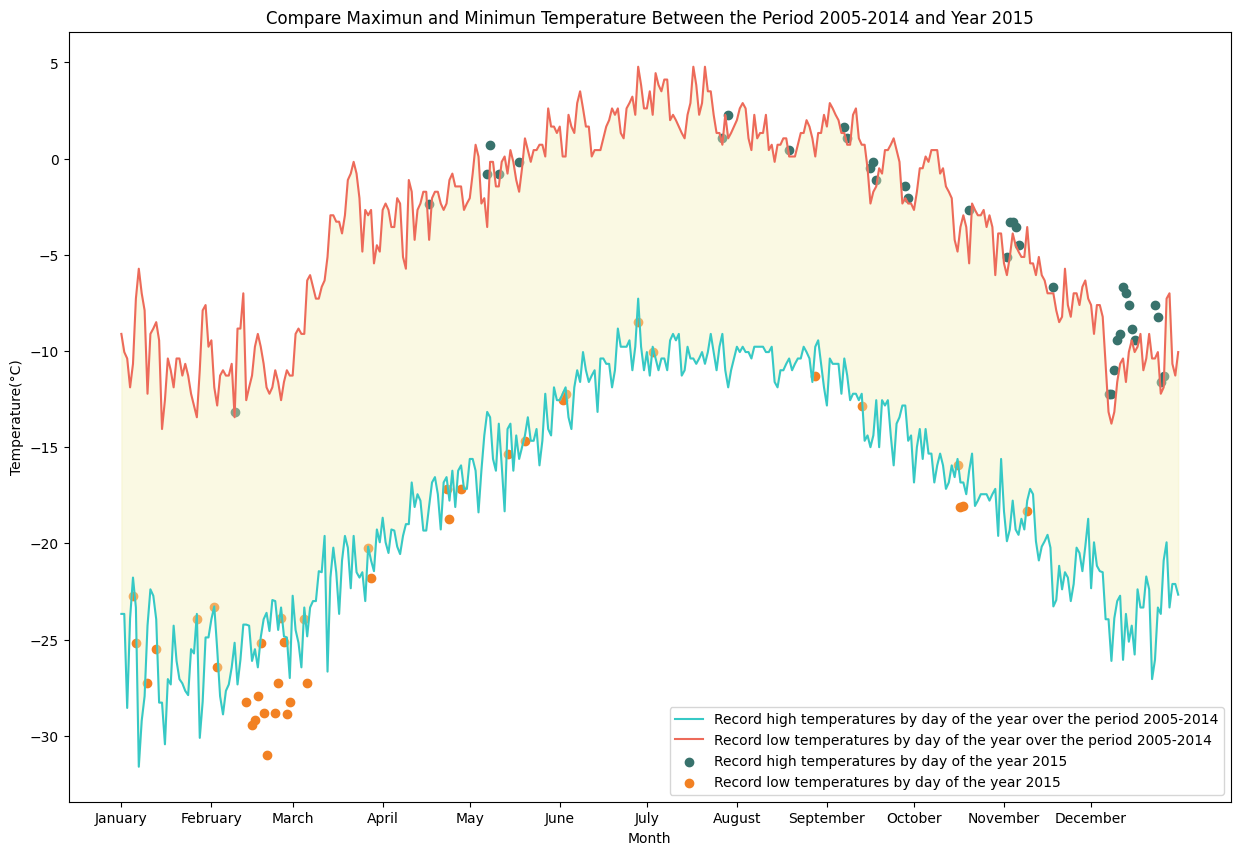

In [244]:
import matplotlib.pyplot as plt
from calendar import month_abbr

fig = plt.figure(figsize=(15, 10))

#Graphic lines of temperatures 
plt.plot(temperature_min_day_year_df['DayOfYear'], temperature_min_day_year_df['Data_Value'], linestyle='-', 
         color='#36C9C6', label='Record high temperatures by day of the year over the period 2005-2014')
plt.plot(temperature_max_day_year_df['DayOfYear'], temperature_max_day_year_df['Data_Value'], linestyle='-', 
         color='#ED6A5A', label='Record low temperatures by day of the year over the period 2005-2014')

#Graphic Months
temperature_max_day_year_df_unique = temperature_max_day_year_df.drop_duplicates(subset=['Month'])
plt.xticks(temperature_max_day_year_df_unique['DayOfYear'], temperature_max_day_year_df_unique['Month'])

temperature_min_per_day_2015_df_2 = temperature_min_per_day_2015_df[temperature_min_per_day_2015_df['Data_Value']<temperature_min_day_year_df['Data_Value']]
temperature_max_per_day_2015_df_2 = temperature_max_per_day_2015_df[temperature_max_per_day_2015_df['Data_Value']>temperature_max_day_year_df['Data_Value']]

plt.scatter(temperature_max_per_day_2015_df_2['DayOfYear'], temperature_max_per_day_2015_df_2['Data_Value'], color='#38726C',label='Record high temperatures by day of the year 2015')
plt.scatter(temperature_min_per_day_2015_df_2['DayOfYear'], temperature_min_per_day_2015_df_2['Data_Value'], color='#F28123',label='Record low temperatures by day of the year 2015')

plt.fill_between(temperature_min_day_year_df['DayOfYear'], temperature_min_day_year_df['Data_Value'], 
                 temperature_max_day_year_df['Data_Value'], color='#F4F1BB', alpha=0.4)

plt.legend()
plt.title('Compare Maximun and Minimun Temperature Between the Period 2005-2014 and Year 2015')
plt.ylabel('Temperature(°C)')
plt.xlabel('Month')

print('Columns in temperature_min_per_day_2015_df:', temperature_min_per_day_2015_df.columns)
print('Columns in temperature_max_per_day_2015_df:', temperature_max_per_day_2015_df.columns)

